# Proyek Analisis Data: E-Commerce
- Nama: Yahya Arsyad Hasibuan
- Email: arsyadhasibuan32@gmail.com
- Id Dicoding:yahyaarsyad

## Menentukan Pertanyaan Bisnis

1. Produk Terlaris dan Terburuk:
    - Produk mana yang saat ini mendominasi penjualan terlaris dan terburuk?
2. Demografis Pelanggan Berdasarkan Lokasi:
    - Bagaimanakah demografi pelanggan berdasarkan lokasi? 
3. Pembayaran dan Rata-Rata Tertinggi:
    - Metode pembayaran apa yang paling banyak digunakan oleh pelanggan?
    - Berapa rata-rata nilai transaksi tertinggi untuk metode pembayaran yang dominan?

## Menyiapkan semua library yang dibuthkan

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


## Data Wrangling

### Gathering Data

#### Mengumpulkan Data.

Proses ini akan berupa pengumpulan data yang dimiliki untuk menjadi bahan dalam melakukan analisis data.

In [3]:
customers=pd.read_csv('customers_dataset.csv')
print(customers.shape)
customers.head()

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
order=pd.read_csv('orders_dataset.csv')
print(order.shape)
order.head()

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
orderItem=pd.read_csv('order_items_dataset.csv')
print(orderItem.shape)
orderItem.head()

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
Payments=pd.read_csv('order_payments_dataset.csv')
print(Payments.shape)
Payments.head()

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
products=pd.read_csv('products_dataset.csv')
print(products.shape)
products

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [8]:
productsCat=pd.read_csv('product_category_name_translation.csv')
print(productsCat.shape)
productsCat.head()

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
sellers=pd.read_csv('sellers_dataset.csv')
print(sellers.shape)
sellers.head()

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
geolocation =pd.read_csv('geolocation_dataset.csv')
print(geolocation.shape)
geolocation.head()      

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### Menggabungkan Beberapa Data.

Menggabungkan beberapa dataset menjadi 2 dataset untuk kebutuhan data analisis selanjutnya yaitu menjadi dataset  newCustomer dan newOrderandProduct

- newCustomer berupa hasil dari penggabungan : order item, product, productCat, sellers
- newOrderandProduct hasil dari penggabungan : customer, order dan payment

##### newCustomer

In [11]:
#membuat dataframe baru newCustomers dengan menggabungkan order dan payment

newCustomer = order.merge(Payments, left_on='order_id', right_on='order_id', how='left')

#membuang tabel sequential dan installment
newCustomer = newCustomer.drop(columns=['payment_sequential','payment_installments'])

#membuat dataframe customer dan membuang tabel time di dataset newCustomer
newCustomer= newCustomer.drop(columns=['order_purchase_timestamp',
                                'order_approved_at',
                                'order_delivered_carrier_date',
                                'order_delivered_customer_date', 
                                'order_estimated_delivery_date',
                                'order_status'])


In [12]:
#membuang zip code prefix dan nunique dalam dataframe baru

dfcustomers = customers.drop(columns=['customer_zip_code_prefix',
                                'customer_unique_id'])

dfcustomers.head()


,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP


In [13]:
#menggabungkan data dfcustomers dengan customer
newCustomer=newCustomer.merge(dfcustomers, left_on='customer_id', right_on='customer_id', how='left')

newCustomer.head()

,order_id,customer_id,payment_type,payment_value,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,credit_card,18.12,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,voucher,2.00,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,voucher,18.59,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,boleto,141.46,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,credit_card,179.12,vianopolis,GO


##### newOrderandProduct

In [14]:
#menggabungkan data product dan product translation
products=products.merge(productsCat, left_on='product_category_name', right_on='product_category_name', how='left')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [15]:
#membuat dataframe baru product menjadi newProduct yang hanya berisi product id, category, dan category name english
newProduct =products[['product_id','product_category_name','product_category_name_english']]
newProduct.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


In [16]:
#membuat dataframe baru newOrderandProduct dan menggabungkan order item dengan newProduct

newOrderandProduct=orderItem.merge(newProduct, left_on='product_id',right_on='product_id', how='left')

print(newOrderandProduct.shape)
newOrderandProduct.head()

(112650, 9)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools


In [17]:
#menggabungkan sellers dengan newOrderandProduct

newOrderandProduct=newOrderandProduct.merge(sellers, left_on='seller_id', right_on='seller_id', how='left')

print(newOrderandProduct.shape)
newOrderandProduct.head()

(112650, 12)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,87900,loanda,PR


In [18]:
#membuang shipping limit date dan seller zipcode karena tidak dibutukan

newOrderandProduct=newOrderandProduct.drop(columns=['shipping_limit_date',
                                                    'seller_zip_code_prefix'])

newOrderandProduct.head()


,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_category_name_english,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,cool_stuff,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,pet_shop,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,moveis_decoracao,furniture_decor,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumaria,perfumery,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,ferramentas_jardim,garden_tools,loanda,PR


### Assessing Data

Pada tahapan ini akan menguji kualitas data untuk digunakan.

##### newCustomer

In [19]:
newCustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        103887 non-null  object 
 1   customer_id     103887 non-null  object 
 2   payment_type    103886 non-null  object 
 3   payment_value   103886 non-null  float64
 4   customer_city   103887 non-null  object 
 5   customer_state  103887 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.8+ MB


tidak ada masalah tipe data yang tidak sesuai

In [20]:
print(f"number of duplicated: {newCustomer.duplicated().sum()}")

newCustomer.isna().sum()

number of duplicated: 615


order_id          0
customer_id       0
payment_type      1
payment_value     1
customer_city     0
customer_state    0
dtype: int64

terdapat data yang duplikat dengan jumlah 615 data, juga missing value pada data payment value dan payment type.

In [21]:
newCustomer.describe()

,payment_value
count,103886.000000
mean,154.100380
std,217.494064
min,0.000000
25%,56.790000
50%,100.000000
75%,171.837500
max,13664.080000


adanya outlier di payment value

##### newOrderandProduct

In [22]:
newOrderandProduct.info()
newOrderandProduct.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   price                          112650 non-null  float64
 5   freight_value                  112650 non-null  float64
 6   product_category_name          111047 non-null  object 
 7   product_category_name_english  111023 non-null  object 
 8   seller_city                    112650 non-null  object 
 9   seller_state                   112650 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 8.6+ MB


order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
price                               0
freight_value                       0
product_category_name            1603
product_category_name_english    1627
seller_city                         0
seller_state                        0
dtype: int64

tidak ada masalah dengan tipe data, tetapi pada category dan category english memiliki missing value yang lumayan banyak

In [23]:
#check missing value pada category dan english
print(newOrderandProduct.shape)

newOrderandProduct.loc[newOrderandProduct["product_category_name_english"].isnull()]

(112650, 10)


,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_category_name_english,seller_city,seller_state
123,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,38e6dada03429a47197d5d584d793b41,7.79,7.78,NaN,NaN,sao paulo,SP
125,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,702835e4b785b67a084280efca355756,7.60,10.96,NaN,NaN,juiz de fora,MG
132,004f5d8f238e8908e6864b874eda3391,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,122.99,15.61,NaN,NaN,guarulhos,SP
142,0057199db02d1a5ef41bacbf41f8f63b,1,41eee23c25f7a574dfaf8d5c151dbb12,e5a3438891c0bfdb9394643f95273d8e,20.30,16.79,NaN,NaN,limeira,SP
171,006cb7cafc99b29548d4f412c7f9f493,1,e10758160da97891c2fdcbc35f0f031d,323ce52b5b81df2cd804b017b7f09aa7,56.00,14.14,NaN,NaN,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...
112306,ff24fec69b7f3d30f9dc1ab3aee7c179,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,122.99,15.61,NaN,NaN,guarulhos,SP
112333,ff3024474be86400847879103757d1fd,1,f9b1795281ce51b1cf39ef6d101ae8ab,3771c85bac139d2344864ede5d9341e3,39.90,9.94,NaN,NaN,sorocaba,SP
112350,ff3a45ee744a7c1f8096d2e72c1a23e4,1,b61d1388a17e3f547d2bc218df02335b,07017df32dc5f2f1d2801e579548d620,139.00,21.42,NaN,NaN,joao pessoa,PB
112438,ff7b636282b98e0aa524264b295ed928,1,431df35e52c10451171d8037482eeb43,6cd68b3ed6d59aaa9fece558ad360c0a,49.90,15.11,NaN,NaN,belo horizonte,MG


In [24]:
print(f"number of duplicated: {newOrderandProduct.duplicated().sum()}")
newOrderandProduct.describe()

number of duplicated: 0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


banyak duplikat dan outlier dibagian price dan freight

### Cleaning Data

##### membersihkan data newCustomer

In [25]:
# membersihkan duplicat di newCustomer

newCustomer=newCustomer.drop_duplicates()
print(f"number of duplicated: {newCustomer.duplicated().sum()}")


number of duplicated: 0


In [26]:
#membersihkan missing value yang ada di newcustomer bagian payment type and payment value

newCustomer = newCustomer.dropna(subset=['payment_type','payment_value'])


In [27]:
print(newCustomer.shape)
newCustomer.isnull().sum()


(103271, 6)


order_id          0
customer_id       0
payment_type      0
payment_value     0
customer_city     0
customer_state    0
dtype: int64

##### membersihkan data newOrderandProduct

In [28]:
newOrderandProduct.info() 
newOrderandProduct.isna().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   price                          112650 non-null  float64
 5   freight_value                  112650 non-null  float64
 6   product_category_name          111047 non-null  object 
 7   product_category_name_english  111023 non-null  object 
 8   seller_city                    112650 non-null  object 
 9   seller_state                   112650 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 8.6+ MB


order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
price                               0
freight_value                       0
product_category_name            1603
product_category_name_english    1627
seller_city                         0
seller_state                        0
dtype: int64

setelah melihat sumber data di kaggle sepertinya ada category nama yang tidak sesuai dengan jumlah data antara bahasa inggris dan bahasa aslinya 

In [29]:
#checking kategory yang tidak ada
diffCat = newOrderandProduct.query("product_category_name.notnull() and product_category_name_english.isnull()")
categories = set(diffCat["product_category_name"])
print(categories)


{'portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'}


ada kategori yang berbeda dari portateis_cozinha_e_preparadores_de_alimentos', dan 'pc_gamer' dengan kategori inggrisnya

In [30]:
#mengganti kategori yang tidak ada dalam english dengan translasi dari bahasa asli
newOrderandProduct["product_category_name_english"] = np.where(newOrderandProduct["product_category_name"] 
                                                    == 'pc_gamer', 'PC Gaming', newOrderandProduct
                                                    ["product_category_name_english"])


newOrderandProduct["product_category_name_english"] = np.where(newOrderandProduct["product_category_name"] 
                                                            =='portateis_cozinha_e_preparadores_de_alimentos', 'tool for kitchen', 
                                                            newOrderandProduct["product_category_name_english"])


In [31]:
#membersihkan missing value di category

newOrderandProduct['product_category_name'].fillna('undefined', inplace= True)
newOrderandProduct['product_category_name_english'].fillna('undefined', inplace= True)

newOrderandProduct.isna().sum()


order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
product_category_name            0
product_category_name_english    0
seller_city                      0
seller_state                     0
dtype: int64

## Exploratory Data Analysis (EDA)

In [32]:
#sebelum memulai saya mendefiniskan beberapa fungsi agar lebih mudah untuk menganalisis
def rentang(seris):
    return seris.max()-seris.min()

### Explore newOrderandProduct

In [33]:
newOrderandProduct.describe(include='all')

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_category_name_english,seller_city,seller_state
count,112650,112650.000000,112650,112650,112650.000000,112650.000000,112650,112650,112650,112650
unique,98666,NaN,32951,3095,NaN,NaN,74,74,611,23
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,cama_mesa_banho,bed_bath_table,sao paulo,SP
freq,21,NaN,527,2033,NaN,NaN,11115,11115,27983,80342
mean,NaN,1.197834,NaN,NaN,120.653739,19.990320,NaN,NaN,NaN,NaN
std,NaN,0.705124,NaN,NaN,183.633928,15.806405,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,0.850000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,39.900000,13.080000,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,74.990000,16.260000,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,134.900000,21.150000,NaN,NaN,NaN,NaN


In [34]:
#melihat produk terlaris dan terburuk
newOrderandProduct.groupby(by='product_category_name_english').agg(
                                                                {'product_id':'count',
                                                                'price':['min','max','mean', rentang]
                                                                }).sort_values(by =('product_id','count'), ascending=False)

product_id   price                              
                                   count     min      max        mean  rentang
product_category_name_english                                                 
bed_bath_table                     11115    6.99  1999.98   93.296327  1992.99
health_beauty                       9670    1.20  3124.00  130.163531  3122.80
sports_leisure                      8641    4.50  4059.00  114.344285  4054.50
furniture_decor                     8334    4.90  1899.00   87.564494  1894.10
computers_accessories               7827    3.90  3699.99  116.513903  3696.09
...                                  ...     ...      ...         ...      ...
cds_dvds_musicals                     14   45.00    65.00   52.142857    20.00
la_cuisine                            14   24.00   389.00  146.785000   365.00
PC Gaming                              9  129.99   239.00  171.772222   109.01
fashion_childrens_clothes              8   39.99   110.00   71.231250    70.01
security_and_services                  2  100.00   183.29  141.645000    83.29

[74 rows x 5 columns]

- pertanyaa 1:
hasilnya menujukkan bahwa bed_bath table adalah produk tertinggi atau terlaris pertama, dan disusul oleh healthy beauty dll.

### Explore newCustomer

In [35]:
newCustomer.describe(include='all')

,order_id,customer_id,payment_type,payment_value,customer_city,customer_state
count,103271,103271,103271,103271.000000,103271,103271
unique,99440,99440,5,NaN,4119,27
top,fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,credit_card,NaN,sao paulo,SP
freq,25,25,76782,NaN,16104,43332
mean,NaN,NaN,NaN,154.845047,NaN,NaN
std,NaN,NaN,NaN,217.897537,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,57.490000,NaN,NaN
50%,NaN,NaN,NaN,100.340000,NaN,NaN
75%,NaN,NaN,NaN,172.455000,NaN,NaN


In [36]:
newCustomer.groupby(by='payment_type').agg({'order_id':'count',
                                            'payment_value':['min','max','mean', rentang]
                                            }).sort_values(by =('order_id','count'), ascending=False)

order_id payment_value                                
                count           min       max        mean   rentang
payment_type                                                       
credit_card     76782          0.01  13664.08  163.317684  13664.07
boleto          19784         11.62   7274.88  145.034435   7263.26
voucher          5173          0.00   3184.34   70.325417   3184.34
debit_card       1529         13.38   4445.50  142.570170   4432.12
not_defined         3          0.00      0.00    0.000000      0.00

In [37]:
newCustomer.groupby(by="payment_type").payment_value.mean().sort_values(ascending=False)

payment_type
credit_card    163.317684
boleto         145.034435
debit_card     142.570170
voucher         70.325417
not_defined      0.000000
Name: payment_value, dtype: float64

pertanyaan 2: jawaban dari pertanyaan no 2 menunjukkan hasil bahwa credit card adalah tipe pembayaran tertinggi dan disusul oleh boleto, juga berdasarkan rata-rata pembayaran creditcard memiliki mean tertinggi yaitu 163.31xxx disusul pula oleh boleto

In [38]:
#melihat demografi pelanggan berdasarkan state dan city
newCustomer.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41745
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [39]:
newCustomer.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

- pertanyan 3: hasil menunjukkan bahwa sao paulo adalah kota dengan customer terbanyak dengan jumlah 15540 dan diposisi terbawah ada 5 kota dengan customer sebanyak 1 customer, sedangkan berdasarkan state adalah dengan kode SP

In [40]:
allDf=pd.merge(
    left=newOrderandProduct,
    right=newCustomer,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
allDf.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_category_name_english,seller_city,seller_state,customer_id,payment_type,payment_value,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,cool_stuff,volta redonda,SP,3ce436f183e68e07877b285a838db11a,credit_card,72.19,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,pet_shop,sao paulo,SP,f6dd3ec061db4e3987629fe6b26e5cce,credit_card,259.83,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,moveis_decoracao,furniture_decor,borda da mata,MG,6489ae5e4333f3693df5ad4372dab6d3,credit_card,216.87,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumaria,perfumery,franca,SP,d4eb9395c8c0431ee92fce09860c5a06,credit_card,25.78,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,ferramentas_jardim,garden_tools,loanda,PR,58dbd0b2d70206bf40e62cd34e84d795,credit_card,218.04,varzea paulista,SP


In [41]:
allDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116918 entries, 0 to 116917
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116918 non-null  object 
 1   order_item_id                  116918 non-null  int64  
 2   product_id                     116918 non-null  object 
 3   seller_id                      116918 non-null  object 
 4   price                          116918 non-null  float64
 5   freight_value                  116918 non-null  float64
 6   product_category_name          116918 non-null  object 
 7   product_category_name_english  116918 non-null  object 
 8   seller_city                    116918 non-null  object 
 9   seller_state                   116918 non-null  object 
 10  customer_id                    116915 non-null  object 
 11  payment_type                   116915 non-null  object 
 12  payment_value                 

In [42]:
# Menghapus baris dengan nilai kosong dari allDf
allDf = allDf.dropna()

In [43]:
allDf.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
product_category_name            0
product_category_name_english    0
seller_city                      0
seller_state                     0
customer_id                      0
payment_type                     0
payment_value                    0
customer_city                    0
customer_state                   0
dtype: int64

In [44]:
allDf.describe(include='all')

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_category_name_english,seller_city,seller_state,customer_id,payment_type,payment_value,customer_city,customer_state
count,116915,116915.000000,116915,116915,116915.000000,116915.000000,116915,116915,116915,116915,116915,116915,116915.000000,116915,116915
unique,98665,NaN,32951,3095,NaN,NaN,74,74,611,23,98665,4,NaN,4110,27
top,fedcd9f7ccdc8cba3a18defedd1a5547,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,NaN,NaN,cama_mesa_banho,bed_bath_table,sao paulo,SP,13aa59158da63ba0e93ec6ac2c07aacb,credit_card,NaN,sao paulo,SP
freq,34,NaN,534,2121,NaN,NaN,11726,11726,29014,83386,34,86746,NaN,18448,49234
mean,NaN,1.195937,NaN,NaN,120.805822,20.032666,NaN,NaN,NaN,NaN,NaN,NaN,173.503818,NaN,NaN
std,NaN,0.698358,NaN,NaN,184.488721,15.834227,NaN,NaN,NaN,NaN,NaN,NaN,268.129952,NaN,NaN
min,NaN,1.000000,NaN,NaN,0.850000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,39.900000,13.080000,NaN,NaN,NaN,NaN,NaN,NaN,61.590000,NaN,NaN
50%,NaN,1.000000,NaN,NaN,74.900000,16.290000,NaN,NaN,NaN,NaN,NaN,NaN,108.860000,NaN,NaN
75%,NaN,1.000000,NaN,NaN,134.900000,21.180000,NaN,NaN,NaN,NaN,NaN,NaN,189.720000,NaN,NaN


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa produk barang terlaris dan terburuk?

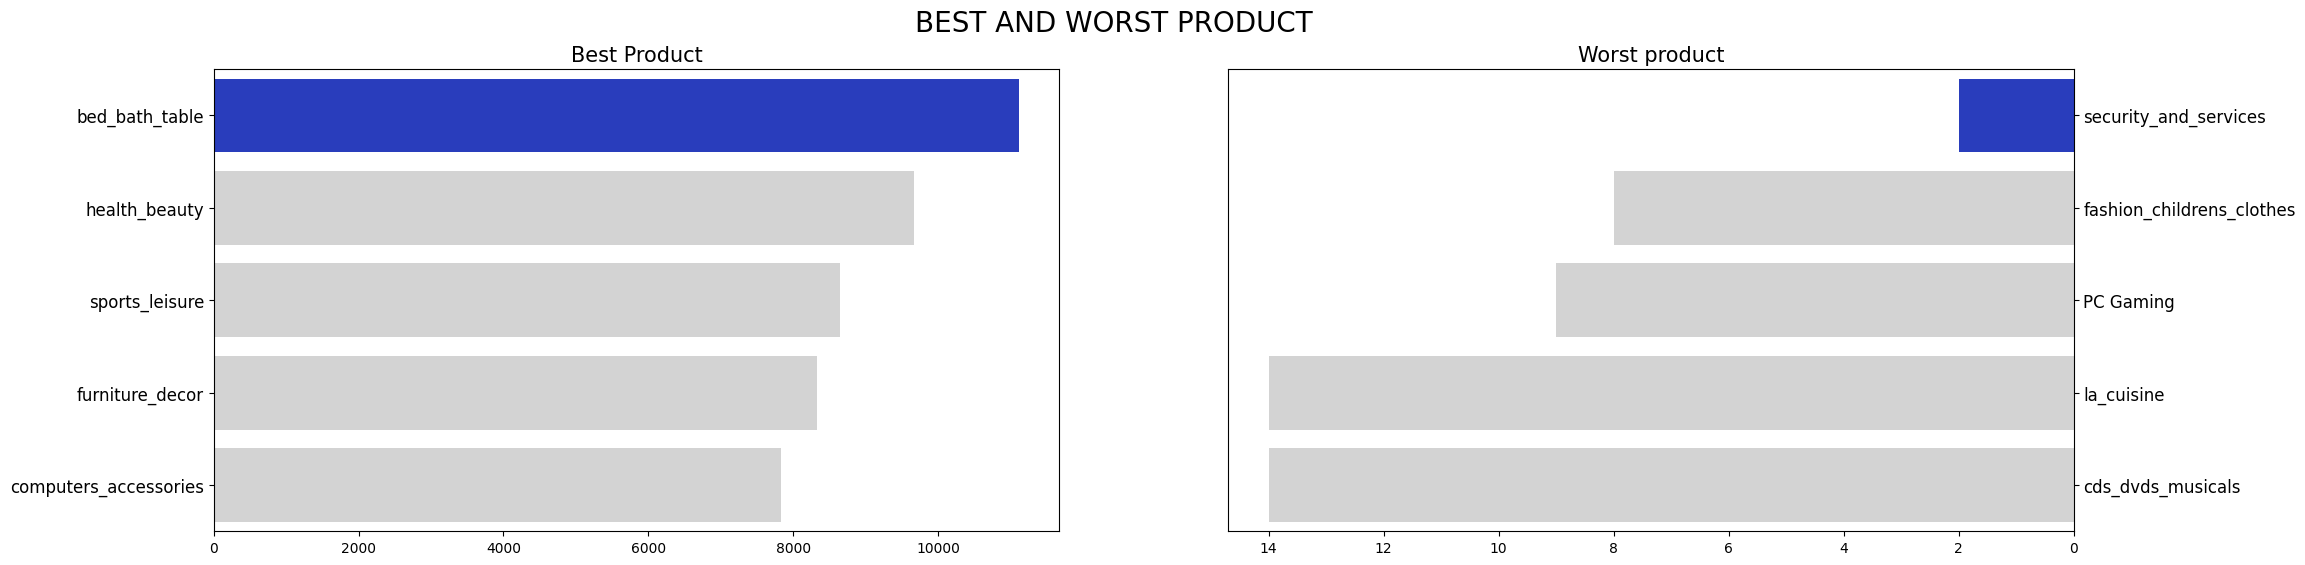

In [49]:
# Membuat dataframe untuk kategori Best Product dan Worst product
frameCatt = newOrderandProduct.groupby(by="product_category_name_english")["product_id"].count().reset_index()
frameCatt = frameCatt.rename(columns={"product_category_name_english": "category", "product_id": "orders"})

# membuat plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#102cd4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="orders", y="category", data=frameCatt.sort_values(by="orders", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="orders", y="category", data=frameCatt.sort_values(by="orders", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("BEST AND WORST PRODUCT", fontsize=20)

# meampilkan plot
plt.show()


### Pertanyaan 2: Apa tipe pembayaran yang mendominasi? dan Berapa rata-rata pembayaran tertinggi?

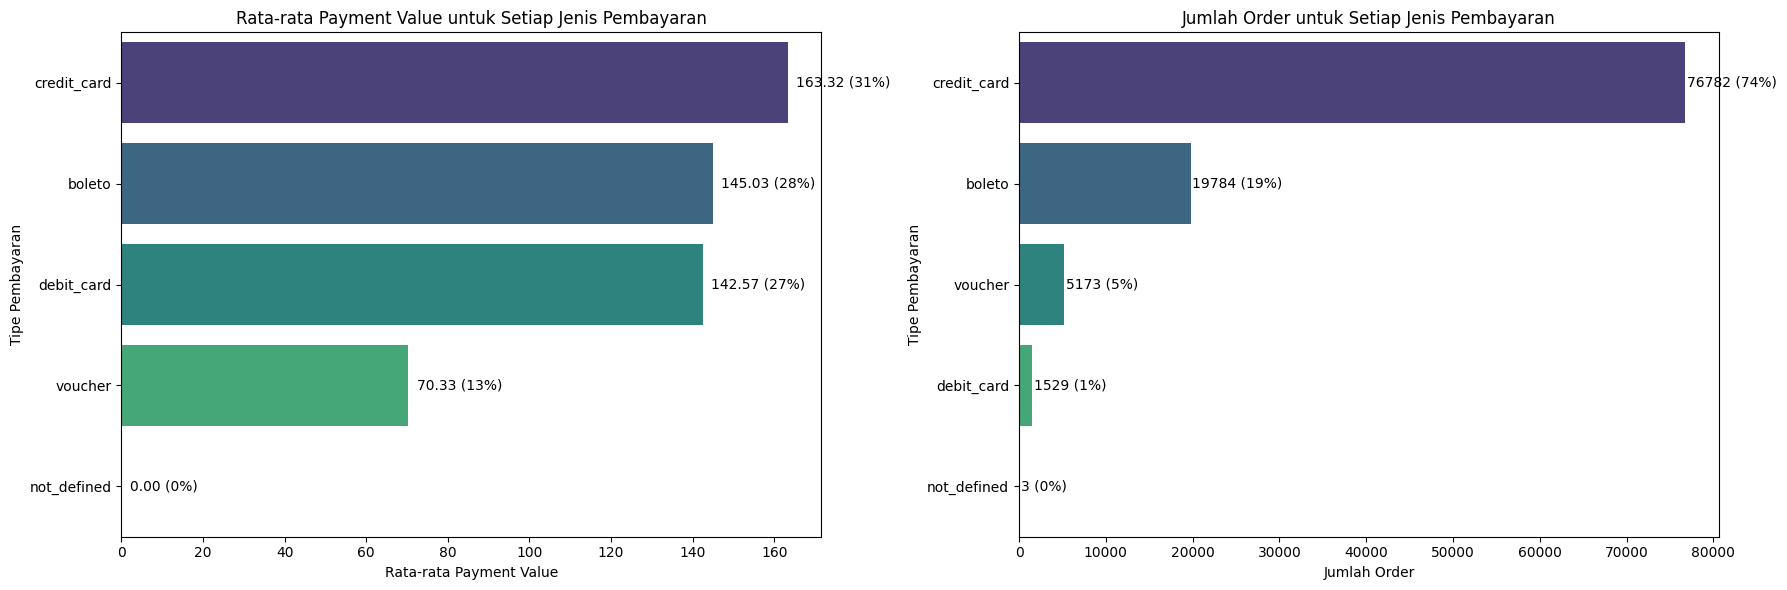

In [54]:
# Menghitung rata-rata payment_value untuk setiap payment_type
payment_mean = newCustomer.groupby(by="payment_type").payment_value.mean().sort_values(ascending=False)

# Menghitung jumlah order untuk setiap payment_type
order_count = newCustomer.groupby(by='payment_type').order_id.count().sort_values(ascending=False)

# Membuat dua subplot berdampingan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot pertama untuk rata-rata payment_value
sns.barplot(x=payment_mean, y=payment_mean.index, palette='viridis', ax=ax1)
for i, v in enumerate(payment_mean):
    ax1.text(v + 2, i, f'{v:.2f} ({round((v/payment_mean.sum())*100)}%)', color='black', ha='left', va='center')
ax1.set_title('Rata-rata Payment Value untuk Setiap Jenis Pembayaran')
ax1.set_xlabel('Rata-rata Payment Value')
ax1.set_ylabel('Tipe Pembayaran')

# Plot kedua untuk jumlah order
sns.barplot(x=order_count, y=order_count.index, palette='viridis', ax=ax2)
for i, v in enumerate(order_count):
    ax2.text(v + 200, i, f'{v} ({round((v/order_count.sum())*100)}%)', color='black', ha='left', va='center')
ax2.set_title('Jumlah Order untuk Setiap Jenis Pembayaran')
ax2.set_xlabel('Jumlah Order')
ax2.set_ylabel('Tipe Pembayaran')

plt.tight_layout()
plt.show()


### 3. Bagaimana demografi customer berdasarkan lokasi?

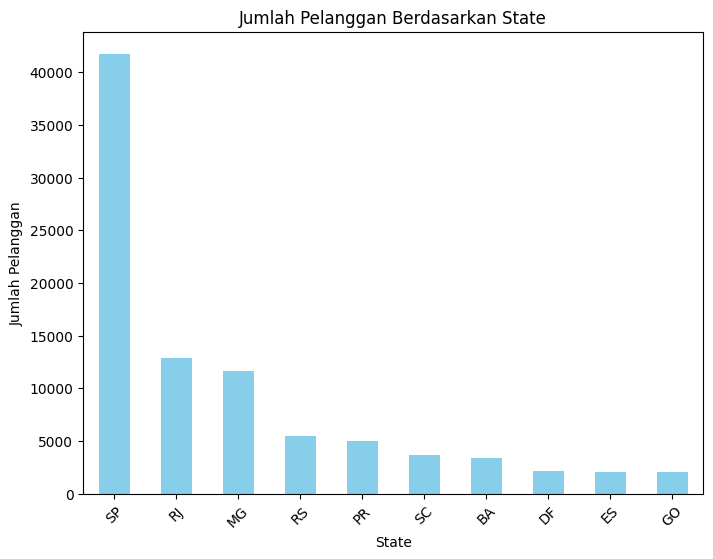

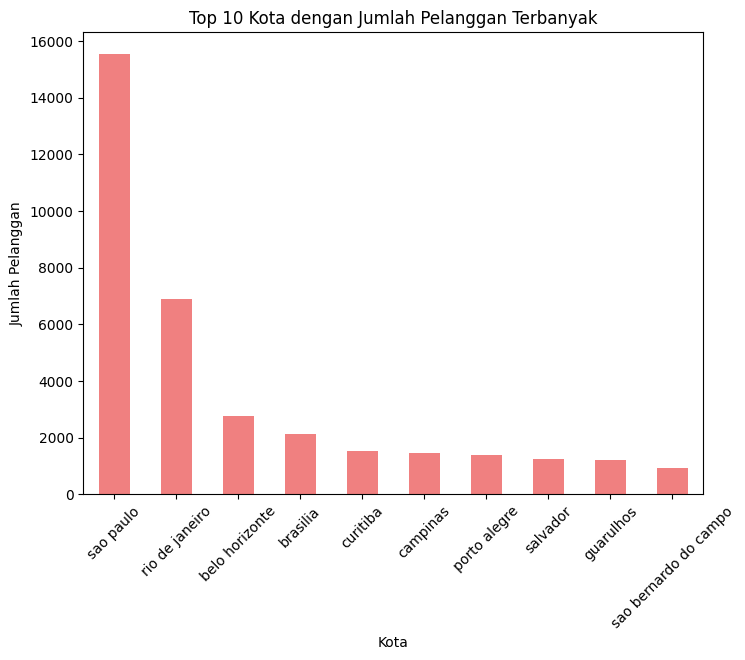

In [47]:
# Grafik berdasarkan state
plt.figure(figsize=(8, 6))
state_counts = newCustomer.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False).head(10)
state_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Pelanggan Berdasarkan State')
plt.xlabel('State')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation= 45)
plt.show()

# Grafik berdasarkan city (kota)
plt.figure(figsize=(8, 6))
city_counts = newCustomer.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False).head(10)
city_counts.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Kota dengan Jumlah Pelanggan Terbanyak')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation= 45)
plt.show()


## Conclusion

- Apa produk yang terlaris dan terburuk?
>Data menunjukkan bahwa produk terlaris atau yang paling diminati adalah bed_bath_table dengan pasangan sebagai produk yang kurang diminati adalah security dan service.

- Tipe pembayaran apa yang mendominasi? dan berapa rata rata dari tipe pembayaran tersebut?
> Berdasarkan dari data yang dianalisi persentase menunjukkan bahwa 75% pemakaian credit card lebih mendominasi customer atau konsumen dalam tipe pembayaran yang ditunjukkan dengan rata-rata dari nilai pembayaran adalah sebesar 163.022616.

- Bagaimana Demografi Customer Berdasarkan Lokasi?
> Dari data yang dimiliki hasil menunjukkan bahwa sao paulo adalah kota dengan customer terbanyak dengan jumlah 15540 dan diposisi terbawah ada 5 kota dengan customer sebanyak 1 customer, sedangkan berdasarkan state adalah dengan kode SP

In [48]:
allDf.to_csv("all_data.csv", index=False)